In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [4]:
#eda

df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [5]:
df.dtypes

School DBN                     object
School Name                    object
School Level                   object
Regents Exam                   object
Year                            int64
Total Tested                    int64
Mean Score                     object
Number Scoring Below 65        object
Percent Scoring Below 65       object
Number Scoring 65 or Above     object
Percent Scoring 65 or Above    object
Number Scoring 80 or Above     object
Percent Scoring 80 or Above    object
Number Scoring CR              object
Percent Scoring CR             object
dtype: object

In [6]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [7]:
df.shape

(212331, 15)

In [13]:
#columns to run the analysis: "School DBN", 'School Name", "Year", "Mean Score"
df2 = df[['School DBN','School Name','Year','Mean Score']]

In [18]:
#finding most recent year
df2['Year'].max()

2017

In [19]:
#finding oldest year
df2['Year'].min()

2015

In [21]:
#finding mode year
df2['Year'].mode()

0    2016
dtype: int64

In [32]:
#Since 2016 is our mode year, we will filter out other years to focus the analysis on this year
df3 = df2[(df2['Year']==2016)]

In [33]:
#Filtering out "s" values on "Mean Score" column
df4 = df3[(df3['Mean Score']!='s')]

In [75]:
df4

,School DBN,School Name,Year,Mean Score
2,01M034,P.S. 034 Franklin D. Roosevelt,2016,74
6,01M140,P.S. 140 Nathan Straus,2016,72.6
9,01M184,P.S. 184m Shuang Wen,2016,79
13,01M188,P.S. 188 The Island School,2016,69
16,01M188,P.S. 188 The Island School,2016,62.1
...,...,...,...,...
212297,84X704,KIPP Academy Charter School,2016,83.7
212304,84X705,Family Life Academy Charter School,2016,77
212305,84X705,Family Life Academy Charter School,2016,76.3
212320,84X717,Icahn Charter School,2016,87.9


In [56]:
#Selected School is "P.S. 034 Franklin D. Roosevelt", which pertains to Manhattan
df5= df4[df4['School DBN'].str.contains('M') & df4['School Name'].str.contains('P.S. 034')]

In [89]:
#Mean Score for "P.S. 034 Franklin D. Roosevelt" is
df8 = df5.groupby(['School Name'])['Mean Score'].apply(pd.to_numeric).mean()
df8

73.83333333333333

In [91]:
#Dataframe for other Manhattan schools
df6 = df4[df4['School DBN'].str.contains('M')]
df7 = df6[df6['School Name']!='P.S. 034 Franklin D. Roosevelt']

In [84]:
df7

,School DBN,School Name,Year,Mean Score
6,01M140,P.S. 140 Nathan Straus,2016,72.6
9,01M184,P.S. 184m Shuang Wen,2016,79
13,01M188,P.S. 188 The Island School,2016,69
16,01M188,P.S. 188 The Island School,2016,62.1
21,01M292,Orchard Collegiate Academy,2016,63.9
...,...,...,...,...
210304,84M726,KIPP STAR College Prep Charter School,2016,61.8
210305,84M726,KIPP STAR College Prep Charter School,2016,65.6
210318,84M726,KIPP STAR College Prep Charter School,2016,55.2
210328,84M726,KIPP STAR College Prep Charter School,2016,82.6


In [90]:
#Mean Score for other schools in Manhattan is
df9 = df7.groupby(['School Name'])['Mean Score'].apply(pd.to_numeric).mean()
df9

67.42456835550513

In [95]:
#Mean Score for other schools in other counties is
df10 = df4[~df4['School DBN'].str.contains('M')]
df11 = df10.groupby(['School Name'])['Mean Score'].apply(pd.to_numeric).mean()

In [96]:
df11

65.12914266908014

In [108]:
labels = ['P.S. 034 Franklin D. Roosevelt', 'Other Manhattan schools', 'Schools in other counties']
my_data = [df8, df9, df11]
arr = np.array(my_data)
d = {'P.S. 034 Franklin D. Roosevelt':df8, 'Other Manhattan schools':df9, 'Schools in other counties':df11}

In [109]:
df12 = pd.Series(data=my_data, index=labels)

In [110]:
df12

P.S. 034 Franklin D. Roosevelt    73.833333
Other Manhattan schools           67.424568
Schools in other counties         65.129143
dtype: float64

In [107]:
import matplotlib.pyplot as plot
%matplotlib inline

<AxesSubplot:title={'center':'Median Test Scores in NY. 2016.'}, xlabel='School', ylabel='Mean Score'>

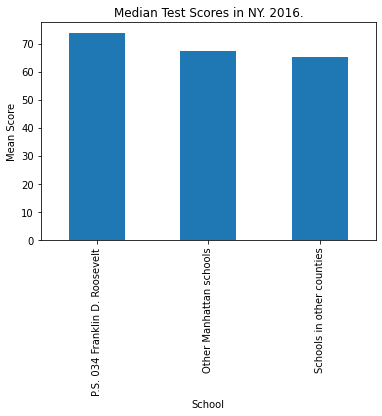

In [123]:
df12.plot(kind="bar", title='Median Test Scores in NY. 2016.', xlabel='School', ylabel='Mean Score')

In [124]:
#For 2016, P.S. 034 Franklin D. Roosevelt school scored an average of 73.83
#while rest of the schools in the same borough scored and average of 67.42
#This means that in 2016 P.S. 034 Franklin D. Roosevelt school performed 6.41 over the rest of the schools in the borough
#Comparing P.S. 034 Franklin D. Roosevelt  with schools in other boroughs (65.12), 
#performance spread grows substantially bigger (8.71 difference). 
